# Now an exploration with Gaussian bumps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot inline
%matplotlib inline

# Add the proper path
import sys
sys.path.append("../")

# Local libraries
from signals.aux_functions import gaussian_bump
from inputs.sensors import Sensor, PerceptualSpace
from inputs.lag_structure import LagStructure

# Widgets library
from ipywidgets import interact

In [2]:
Tmax = 1000
dt = 1.0
time = np.arange(0, Tmax, dt)


In [3]:
mean = 50
max_rate = 100
baseline = 20
HWHM = 20
attenuation = 2


### First a show case of the gaussian bump

In [4]:
def plot_gaussian_bump(mu):
    plt.plot(time, gaussian_bump(time, mu, max_rate, baseline, HWHM, attenuation))
    plt.ylim([0, max_rate])
    

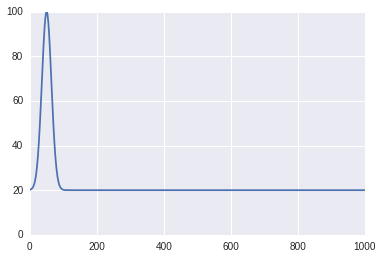

In [5]:
plot_gaussian_bump(mean)

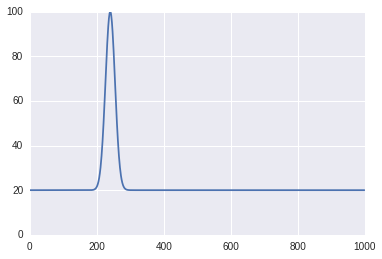

In [7]:
interact(plot_gaussian_bump, mu=(20, 300, 10))

In [ ]:
def plot_gaussian_bump2(mu, Max, base, value, a):
    plt.plot(time, gaussian_bump(time, mu, Max, base, value, a))
    plt.ylim([0, 120])

In [ ]:
interact(plot_gaussian_bump2, mu=(100, 500), Max=(50, 100), 
         base=(0, 20), value=(10, 20), a=(2, 5))